# Lesson 1 - Caltech 256

In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai import *
from fastai.vision import *

In [14]:
path = "./data/256_ObjectCategoriesSplit"

In [15]:
doc(get_transforms)

In [16]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=75)

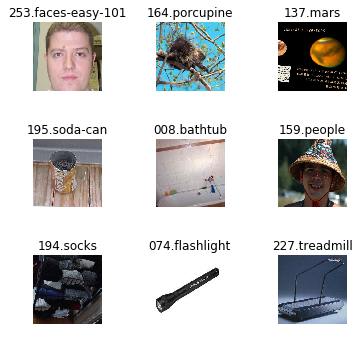

In [17]:
data.show_batch(rows=3, figsize=(5,5))

In [18]:
print(data.classes)
len(data.classes)

['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug', '011.billiards', '012.binoculars', '013.birdbath', '014.blimp', '015.bonsai-101', '016.boom-box', '017.bowling-ball', '018.bowling-pin', '019.boxing-glove', '020.brain-101', '021.breadmaker', '022.buddha-101', '023.bulldozer', '024.butterfly', '025.cactus', '026.cake', '027.calculator', '028.camel', '029.cannon', '030.canoe', '031.car-tire', '032.cartman', '033.cd', '034.centipede', '035.cereal-box', '036.chandelier-101', '037.chess-board', '038.chimp', '039.chopsticks', '040.cockroach', '041.coffee-mug', '042.coffin', '043.coin', '044.comet', '045.computer-keyboard', '046.computer-monitor', '047.computer-mouse', '048.conch', '049.cormorant', '050.covered-wagon', '051.cowboy-hat', '052.crab-101', '053.desk-globe', '054.diamond-ring', '055.dice', '056.dog', '057.dolphin-101', '058.doorknob', '059.drinking-straw', '060.du

257

In [11]:
doc(ConvLearner)

In [19]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [20]:
learn.fit_one_cycle(5)

Total time: 14:53
epoch  train loss  valid loss  error_rate
1      1.292529    0.775418    0.199936    (03:02)
2      1.015921    0.657550    0.168435    (02:57)
3      0.759036    0.593557    0.155416    (02:58)
4      0.529594    0.531397    0.130987    (02:57)
5      0.390150    0.516886    0.130826    (02:57)



In [21]:
learn.save('stage-1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

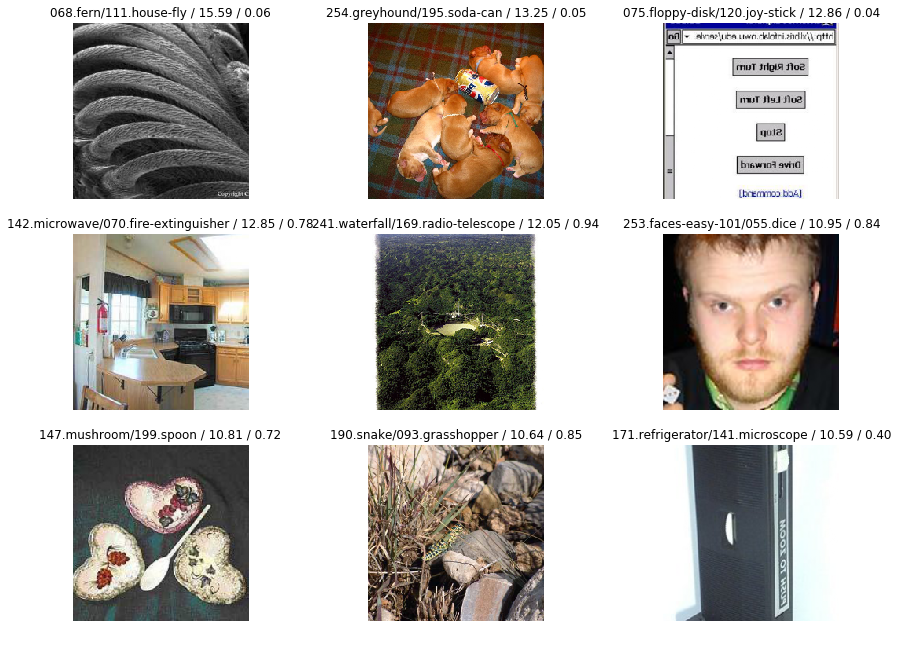

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

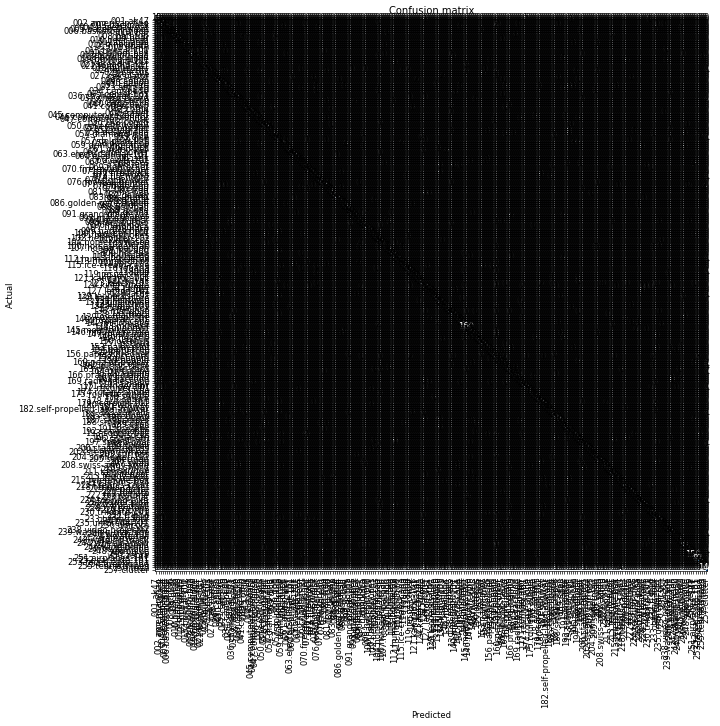

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)

Total time: 03:56
epoch  train loss  valid loss  error_rate
1      1.587920    1.060291    0.260366    (03:56)



In [30]:
learn.load('stage-1')

In [31]:
learn.lr_find()

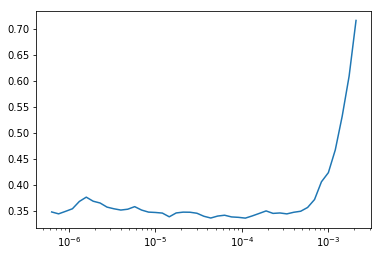

In [32]:
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

Total time: 07:48
epoch  train loss  valid loss  error_rate
1      0.469907    0.541922    0.137416    (03:52)
2      0.329247    0.503627    0.127451    (03:55)



In [34]:
interp = ClassificationInterpretation.from_learner(learn)

In [35]:
interp.most_confused(min_val=2)

[('091.grand-piano-101', '099.harpsichord', 9),
 ('063.electric-guitar-101', '136.mandolin', 8),
 ('001.ak47', '173.rifle', 7),
 ('044.comet', '082.galaxy', 5),
 ('069.fighter-jet', '251.airplanes-101', 4),
 ('080.frog', '256.toad', 4),
 ('122.kayak', '030.canoe', 4),
 ('180.screwdriver', '233.tuning-fork', 4),
 ('191.sneaker', '255.tennis-shoes', 4),
 ('255.tennis-shoes', '191.sneaker', 4),
 ('125.knife', '180.screwdriver', 3),
 ('126.ladder', '171.refrigerator', 3),
 ('146.mountain-bike', '224.touring-bike', 3),
 ('159.people', '119.jesus-christ', 3),
 ('173.rifle', '231.tripod', 3),
 ('249.yo-yo', '079.frisbee', 3),
 ('254.greyhound', '056.dog', 3)]